C:\Users\ryans\Anaconda3\envs\np_workflows_v1\lib\site-packages\napari_tools_menu\__init__.py:165: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<function gaussian_blur at 0x0000023D4B701670>
('blobs',)
{'sigma': 1.0}


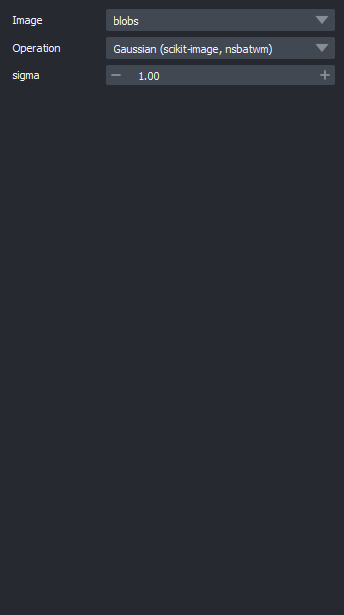

In [1]:
from napari_workflows._io_yaml_v1 import load_workflow
from napari_assistant._gui._Assistant import Assistant
from napari_assistant._categories import CATEGORIES

import napari
import inspect
from skimage.io import imread

blobs = imread(r"C:\Users\ryans\OneDrive\Desktop\blobs.tif")
viewer = napari.Viewer()
widget = Assistant(viewer)
viewer.add_image(blobs)
viewer.window.add_dock_widget(widget)
widget.seach_field.setText("nsbatw")
widget._activate(CATEGORIES["Remove noise"])

In [2]:
wf = load_workflow(r"C:\Users\ryans\test.yaml")
print(wf)

Workflow:
Result of Black top-hat (scipy, nsbatwm) <- (<function black_tophat at 0x0000023D4B701C10>, 'Result of Gaussian (scikit-image, nsbatwm)', 10.0)
Result of Gaussian (scikit-image, nsbatwm) <- (<function gaussian_blur at 0x0000023D4B701670>, 'blobs', 1.0)



In [3]:
blur = wf._tasks["Result of Gaussian (scikit-image, nsbatwm)"][0]
toph = wf._tasks["Result of Black top-hat (scipy, nsbatwm)"][0]

In [4]:
blur

<function napari_segment_blobs_and_things_with_membranes.gaussian_blur(image: <function NewType.<locals>.new_type at 0x0000023D320FAA60>, sigma: float = 1, viewer: napari.viewer.Viewer = None) -> <function NewType.<locals>.new_type at 0x0000023D320FAA60>>

In [5]:
toph.__doc__

In [6]:
from napari_assistant._categories import get_category_of_function, get_name_of_function, all_operations
category_blur = all_operations()['Filtering / noise removal>Gaussian (scikit-image, nsbatwm)']
category_blur

<function napari_segment_blobs_and_things_with_membranes.gaussian_blur(image: <function NewType.<locals>.new_type at 0x0000023D320FAA60>, sigma: float = 1, viewer: napari.viewer.Viewer = None) -> <function NewType.<locals>.new_type at 0x0000023D320FAA60>>

In [7]:
blur == category_blur

True

In [8]:
category_toph = all_operations()['Filtering / background removal>Black top-hat (scipy, nsbatwm)']
category_toph

<function napari_segment_blobs_and_things_with_membranes.black_tophat(image: <function NewType.<locals>.new_type at 0x0000023D320FAA60>, radius: float = 2, viewer: napari.viewer.Viewer = None) -> <function NewType.<locals>.new_type at 0x0000023D320FAA60>>

In [9]:
category_toph == toph

True

In [10]:
wf_clesperanto = load_workflow("clesperanto_blur.yaml")
print(wf_clesperanto)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x0000023D374DDCA0>, 'blobs', None, 1.0, 1.0, 0.0)



In [11]:
clesperanto_blur = wf_clesperanto._tasks["Result of gaussian_blur (clesperanto)"][0]
clesperanto_blur

<function pyclesperanto_prototype.gaussian_blur(source: Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage], destination: Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage] = None, sigma_x: float = 0, sigma_y: float = 0, sigma_z: float = 0) -> Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage]>

In [12]:
category_cle_blur = all_operations()['Filtering / noise removal>gaussian_blur (clesperanto)']
category_cle_blur

<function pyclesperanto_prototype.gaussian_blur(source: Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage], destination: Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage] = None, sigma_x: float = 0, sigma_y: float = 0, sigma_z: float = 0, *, viewer: 'napari.viewer.Viewer' = None) -> Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage]>

In [13]:
category_cle_blur == clesperanto_blur

False

In [14]:
from napari_time_slicer import time_slicer

In [15]:
category_cle_blur == clesperanto_blur

False

In [16]:
print(blur)

<function gaussian_blur at 0x0000023D4B701670>


In [17]:
print(category_blur)

<function gaussian_blur at 0x0000023D4B701670>


In [18]:
print(category_cle_blur)

<function gaussian_blur at 0x0000023D4B8B21F0>


In [19]:
print(clesperanto_blur)

<function gaussian_blur at 0x0000023D374DDCA0>


In [20]:
from pyclesperanto_prototype import gaussian_blur
print(gaussian_blur)

<function gaussian_blur at 0x0000023D374DDCA0>


In [21]:
print(category_cle_blur.__wrapped__)

<function gaussian_blur at 0x0000023D374DDCA0>


In [22]:
print(clesperanto_blur.__wrapped__)

<function gaussian_blur at 0x0000023D374DDB80>


In [23]:
print(gaussian_blur.__wrapped__)

<function gaussian_blur at 0x0000023D374DDB80>


In [24]:
clesperanto_blur == category_cle_blur.__wrapped__

True

In [26]:
blur == category_blur

True